# Expected wait times at Burning Man

In [4]:
# imports
from pathlib import Path
import pandas as pd
import os

In [205]:
# Point to data
f_traffic_report = Path(os.path.join(os.path.abspath('..'), 'data/raw_traffic-2019.xlsx'))
assert os.path.exists(f_traffic_report), print(f_traffic_report)



In [218]:
# Load data
df_traffic_raw = pd.read_excel(f_traffic_report)

# # select only reports from >=2016
# key = df_traffic_raw['Data_Year'] >= 2016
# df_traffic_raw = df_traffic_raw.loc[key].copy()

print(df_traffic_raw.head())


           created_at  Hours Wait  Includes 'Hour'  Includes 'To Wadsworth'  \
0 2014-08-21 15:44:56         0.0            False                    False   
1 2014-08-24 05:00:50         0.0            False                    False   
2 2014-08-24 05:04:03         0.0            False                    False   
3 2014-08-24 05:16:44         0.0             True                    False   
4 2014-08-24 05:26:10         0.0            False                    False   

   Hours Regex  Just Hours  No Wait   Ref_Day Has_Time  Data_Year  2014  2015  \
0          NaN         NaN    False  0.656204       No       2014   0.0   0.0   
1          NaN         NaN    False  3.208912       No       2014   0.0   0.0   
2          NaN         NaN    False  3.211146       No       2014   0.0   0.0   
3          NaN         NaN    False  3.219954      Yes       2014   0.0   0.0   
4          NaN         NaN    False  3.226505       No       2014   0.0   0.0   

   2016  2017  2018  2019  2020  \
0  

In [219]:
import datetime

def get_tweet_hour(_df):
    '''
    Calculates hour of day for a given entry based on Datetime ISO
    '''
    # convert 'created_at' to universal time stamps
    tweet_times = _df['created_at'].dt.hour.values
#     print(tweet_times)
    
    return tweet_times

def get_tweet_weekday(_df):
    '''
    Calculates day of the week for a given entry based on Datetime ISO
    Also makes Monday last day of the week, such that 1=Tuesday, 7=Monday
    '''


    # convert 'created_at' to universal time stamps
    tweet_times = _df['created_at'].dt.dayofweek.values
    # print(tweet_times)

    # shift monday form 0 -> 7
    key = tweet_times == 0
    tweet_times[key] = 7

    # shift tuesday form 1 -> 8
    key = tweet_times == 1
    tweet_times[key] = 8

    # print(tweet_times)
    
    return tweet_times

df_traffic = df_traffic_raw.copy()
df_traffic['weekday'] = get_tweet_weekday(df_traffic)
df_traffic['hour'] = get_tweet_hour(df_traffic)
df_traffic['ts'] = calculate_days_from_opening(df_traffic)

# keep only tweets with 'Hour'
key = df_traffic['Includes \'Hour\'']
df_traffic = df_traffic.loc[key]

print(df_traffic.head())

            created_at  Hours Wait  Includes 'Hour'  Includes 'To Wadsworth'  \
3  2014-08-24 05:16:44         0.0             True                    False   
5  2014-08-24 14:04:24         0.0             True                    False   
8  2014-08-24 16:59:55         0.0             True                    False   
10 2014-08-24 18:00:46         0.0             True                    False   
11 2014-08-24 19:05:59         0.0             True                    False   

    Hours Regex  Just Hours  No Wait   Ref_Day Has_Time  Data_Year    ...     \
3           NaN         NaN    False  3.219954      Yes       2014    ...      
5           NaN         NaN    False  3.586389      Yes       2014    ...      
8           NaN         NaN    False  3.708275      Yes       2014    ...      
10          NaN         NaN    False  3.750532      Yes       2014    ...      
11          NaN         NaN    False  3.795822      Yes       2014    ...      

    2015  2016  2017  2018  2019  2020

In [256]:
dict_starts = dict()
dict_starts[2014] = np.datetime64('2014-08-25 10:00:00')
dict_starts[2015] = np.datetime64('2015-08-30 10:00:00')
dict_starts[2016] = np.datetime64('2016-08-28 00:01:00')
dict_starts[2017] = np.datetime64('2017-08-27 00:01:00')
dict_starts[2018] = np.datetime64('2018-08-26 00:01:00')

def calculate_days_from_opening(df, fine=True):
    
    dt_diffs = []
    
    for i, dat in df.iterrows():
#         print(dat)
        
        dt = dat['created_at']
        dt_ref = dict_starts[dat['Data_Year']]
        dt_diff = dt - dt_ref
        
#         print(i, dt, dt_ref, dt_diff)

        val = dt_diff.days
        if fine: val += (dt_diff.seconds/60/60/24)
        else: val += int((dt_diff.seconds/60/60/24)*4) / 4.
#         print(val)
        dt_diffs.append(val)
        
#         if i > 2: break

    return dt_diffs
        
df_traffic['ts'] = calculate_days_from_opening(df_traffic)
df_traffic['ts_coarse'] = calculate_days_from_opening(df_traffic, fine=False)

In [257]:
print(df_traffic_raw['Hours Wait'].max())
print(df_traffic['ts_coarse'].value_counts())

10.0
-0.25     27
 7.75     27
 8.50     23
 1.25     23
 1.00     20
 0.75     20
 0.00     20
 8.25     19
 0.50     19
 7.25     18
 1.50     18
 7.50     17
 0.25     17
-0.50     17
 7.00     16
 8.00     16
-0.75     15
 8.75     14
 6.75     13
 9.00     11
 1.75     10
-1.00     10
-1.25      9
 9.25      9
 2.00      8
 2.25      8
 6.50      7
 3.00      7
 2.50      7
-1.75      6
 9.50      6
 5.75      5
 5.00      5
-2.00      5
-1.50      5
 2.75      4
 9.75      4
 10.00     4
 6.25      3
 4.75      3
 5.50      3
-2.25      3
 6.00      2
 3.25      1
 4.00      1
 4.50      1
Name: ts_coarse, dtype: int64


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

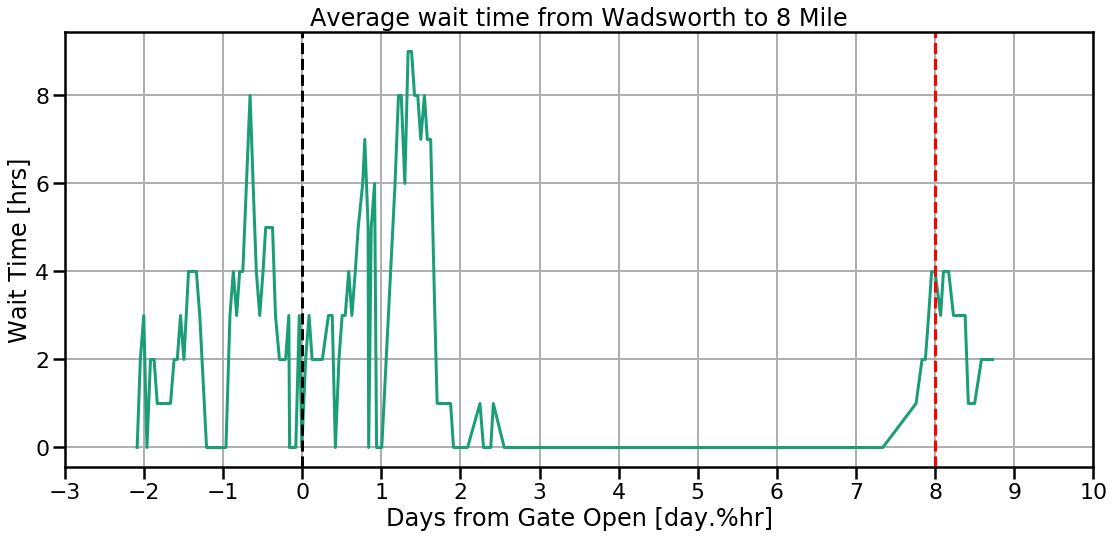

In [269]:

# crop
key = np.array(df_traffic['Data_Year'] >= 2018, dtype=bool)
df_plt = df_traffic.loc[key].copy()

# Plot
mode = 'line'

fig, ax = plt.subplots(1, figsize=(16,8))

if mode=='bar':
    sns.barplot(y='Hours Wait', x='ts', hue='Data_Year', data=df_plt, ax=ax)
    ticks = np.arange(2,9)-1
elif mode=='line':
    sns.lineplot(y='Hours Wait', x='ts', hue='Data_Year', data=df_plt, ax=ax, palette='Dark2')
    ticks = np.arange(-3,11)

# tick_labels = ['Thr', 'Fri','Sat','Sun','Mon','Tue','Wed', 'Thr', 'Fri', 'Sat', 'Sun', 'Mon' ]

ax.axvline(0, color='k', linestyle='--')
ax.axvline(8, color='r', linestyle='--')

ax.set_xticks(ticks)
# ax.set_xticklabels(tick_labels)
ax.set_xlabel('Days from Gate Open [day.%hr]')
ax.set_ylabel('Wait Time [hrs]')
ax.grid(which='both', axis='both')
ax.legend().set_visible(False)
# ax.legend(frameon=True, loc='lower center', bbox_to_anchor=(0.5, -.35), ncol=5, fancybox=False)

ax.set_title('Average wait time from Wadsworth to 8 Mile')

plt.tight_layout()

C:\Users\pgabr\Anaconda2\envs\cogs18\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


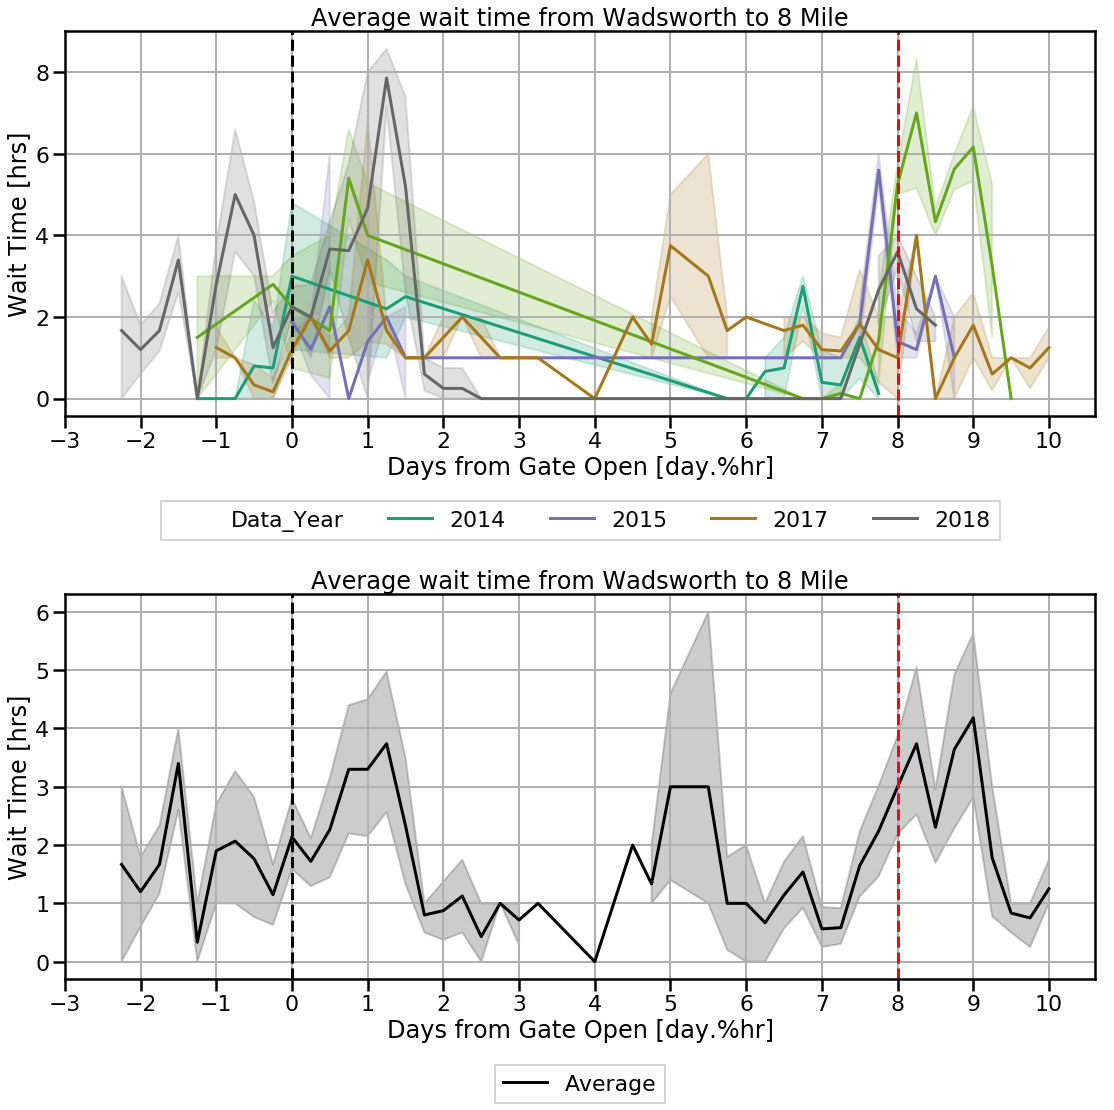

In [264]:

# crop
key = np.array(df_traffic['Data_Year'] >= 2014, dtype=bool)
df_plt = df_traffic.loc[key].copy()

# Plot

fig, axs = plt.subplots(2,1, figsize=(16,16))

sns.lineplot(y='Hours Wait', x='ts_coarse', hue='Data_Year', data=df_plt, ax=axs[0], palette='Dark2')
sns.lineplot(y='Hours Wait', x='ts_coarse', data=df_plt, ax=axs[1], color='k', label='Average')
ticks = np.arange(-3,11)

# tick_labels = ['Thr', 'Fri','Sat','Sun','Mon','Tue','Wed', 'Thr', 'Fri', 'Sat', 'Sun', 'Mon' ]


for ax in axs:
    ax.axvline(0, color='k', linestyle='--')
    ax.axvline(8, color='r', linestyle='--')

    ax.set_xticks(ticks)
    # ax.set_xticklabels(tick_labels)
    ax.set_xlabel('Days from Gate Open [day.%hr]')
    ax.set_ylabel('Wait Time [hrs]')
    ax.grid(which='both', axis='both')
    # ax.legend(frameon=True)
    ax.legend(frameon=True, loc='lower center', bbox_to_anchor=(0.5, -.35),
          ncol=6, fancybox=False)
    
    ax.set_title('Average wait time from Wadsworth to 8 Mile')
plt.tight_layout()